In [1]:
from ray.tune import ExperimentAnalysis
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
analysis_full = pd.read_csv(
    "../hparam_results/cnn2_mnist_lr_optim_20221019/results_cnn2_mnist_lr_optim_20221019.csv",
    index_col=0)

In [18]:
analysis_full = ExperimentAnalysis("../hparam_results/cnn2_mnist_lr_optim_20221019")
analysis_tenth = ExperimentAnalysis("../hparam_results/cnn2_mnist_lr_tenth_optim_20221019")
df_full = analysis_full.results_df
df_tenth = analysis_tenth.results_df

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00000_0_lr=0.0005_2022-10-19_19-37-17'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of th

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00002_2_lr=0.0000_2022-10-19_19-38-07'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of th

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00004_4_lr=0.0002_2022-10-19_19-40-08'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of th

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00006_6_lr=0.0004_2022-10-19_19-40-54'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of th

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00008_8_lr=0.0012_2022-10-19_19-41-19'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of th

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00010_10_lr=0.0013_2022-10-19_19-44-21'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00012_12_lr=0.0002_2022-10-19_19-45-33'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00014_14_lr=0.0025_2022-10-19_19-45-48'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00016_16_lr=0.0045_2022-10-19_19-46-26'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00018_18_lr=0.0000_2022-10-19_19-50-27'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00020_20_lr=0.0000_2022-10-19_19-50-38'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00022_22_lr=0.0010_2022-10-19_19-50-49'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00024_24_lr=0.0016_2022-10-19_19-51-03'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00026_26_lr=0.0004_2022-10-19_19-52-10'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00028_28_lr=0.0000_2022-10-19_19-52-21'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00030_30_lr=0.0002_2022-10-19_19-52-32'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00032_32_lr=0.0008_2022-10-19_19-53-24'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00034_34_lr=0.0056_2022-10-19_19-53-40'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00036_36_lr=0.0001_2022-10-19_20-05-21'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00038_38_lr=0.0272_2022-10-19_20-05-38'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00040_40_lr=0.0010_2022-10-19_20-06-08'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00042_42_lr=0.0000_2022-10-19_20-06-26'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00044_44_lr=0.0000_2022-10-19_20-07-19'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00046_46_lr=0.0000_2022-10-19_20-12-45'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00048_48_lr=0.0083_2022-10-19_20-12-59'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00050_50_lr=0.0195_2022-10-19_20-13-24'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00052_52_lr=0.0213_2022-10-19_20-14-21'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00054_54_lr=0.0000_2022-10-19_20-14-51'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00056_56_lr=0.0694_2022-10-19_20-15-25'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00058_58_lr=0.0660_2022-10-19_20-16-17'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00060_60_lr=0.0002_2022-10-19_20-16-29'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00062_62_lr=0.0101_2022-10-19_20-16-46'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00064_64_lr=0.0022_2022-10-19_20-26-17'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00066_66_lr=0.0003_2022-10-19_20-26-59'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00068_68_lr=0.0000_2022-10-19_20-29-25'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00070_70_lr=0.0001_2022-10-19_20-30-20'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00072_72_lr=0.0018_2022-10-19_20-30-34'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00074_74_lr=0.0000_2022-10-19_20-31-01'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00076_76_lr=0.0000_2022-10-19_20-31-28'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00078_78_lr=0.0389_2022-10-19_20-31-55'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00080_80_lr=0.0000_2022-10-19_20-32-28'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00082_82_lr=0.0006_2022-10-19_20-32-46'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00084_84_lr=0.0133_2022-10-19_20-33-22'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00086_86_lr=0.0000_2022-10-19_20-33-51'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00088_88_lr=0.0005_2022-10-19_20-34-49'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00090_90_lr=0.0000_2022-10-19_20-35-49'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00092_92_lr=0.0130_2022-10-19_20-36-19'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00094_94_lr=0.0009_2022-10-19_20-38-08'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00096_96_lr=0.0014_2022-10-19_20-38-43'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

Could not load trials from experiment checkpoint. This means your experiment checkpoint is likely faulty or incomplete, and you won't have access to all analysis methods. Observed error:
Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019/train_func_706f3_00098_98_lr=0.0000_2022-10-19_20-39-06'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alex/anaconda3/envs/hparam_project/lib/python3.8/pathlib.py", line 1288, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Personal projects/hparam_project/hparam_results/cnn2_mnist_lr_tenth_optim_20221019'

During handling of t

TuneError: No trials found.

In [17]:
best_lr_full = analysis.get_best_config('val_loss', 'min')['optimizer_cfg']['args']['lr']

In [23]:
df.to_csv("results.csv")

In [3]:

# df = df[df['done'] == True]
# df = df.loc[df['val_loss'].dropna().index, :]

Text(0.5, 0, 'val loss after 10 epochs')

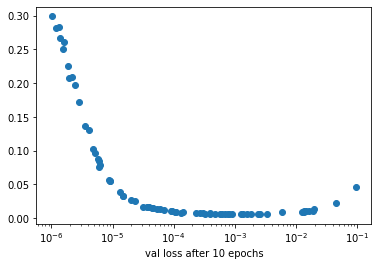

In [8]:
fig, ax = plt.subplots()

df_ten_epoch = df[df['training_iteration']==10]
ax.scatter(df_ten_epoch['config/optimizer_cfg/args/lr'],
            df_ten_epoch['val_loss'])
ax.set_xscale('log')
ax.set_xlabel("learning_rate")
ax.set_ylabel("val loss after 10 epochs")

# Find learning rate with pytorch lightning

In [27]:
!ls training_configs

pytorch_classifier_mnist.yaml  simple_training.yaml


In [1]:
from hparam_tuning_project.training.trainer import Trainer
from hparam_tuning_project.data.datasets import PytorchDataset
import pytorch_lightning as pl
from hparam_tuning_project.utils import initialize_callbacks
import yaml

with open("training_configs/pytorch_classifier_mnist.yaml", "r")  as f:
    cfg = yaml.safe_load(f)
dataset = PytorchDataset(**cfg['training_cfg']['data_cfg'])
model = Trainer(**cfg['training_cfg'])
callbacks = initialize_callbacks(cfg['callbacks'])
learner = pl.Trainer(**cfg['flags'], callbacks=callbacks, auto_lr_find=True)
# learner.fit(model, dataset)

/home/alex/anaconda3/envs/hparam_project/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/alex/anaconda3/envs/hparam_project/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/alex/anaconda3/envs/hparam_project/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and 

In [7]:
lr_finder = learner.tune(model, dataset)

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Learning rate set to 0.0022908676527677745
Restoring states from the checkpoint path at ./.lr_find_7f8bce00-7925-46b3-8e50-0d44cc708e02.ckpt


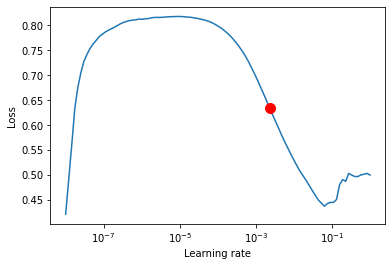

In [8]:
lr_finder['lr_find'].plot(suggest=True)